Student: Duncan Ferguson <br>
Student Id: 871641260 <br>
Class: Comp 4431-1 <br>
Assignment: Exercise 6 <br>
Date: 10/22/2021 <br>
Group: Name: Broken Toe <br>
Group Members: Emma Bright, Mike Santoro <br>

# Part 1

You are to write code implementing the k-means clustering algorithm assuming a 3-dimensional data set and test it.
Make your code work for 3 clusters.  (If you want you can make it work for 2-clusters first then modify for 3-clusters,
 but the data set I am providing nicely produces three clusters).

Once your code works, run it on this test file: exercise8_infile1.csv Download exercise8_infile1.csv

For output print out the number in each cluster and the list of points in each cluster.  Your output should look
something like this: exercise8_output.txt

In [13]:
import pandas as pd
import numpy as np

def Euclidean_D(point1, point2):
    """This Function Finds the distance between two 3d points"""
    dist = (((point2[0]-point1[0])**2) + ((point2[1]-point1[1])**2) + ((point2[2]-point1[2])**2))**(1/2)
    return dist

def assign_clusters(centroids, df):
    """This Assigns Clusters to closest centroid"""
    divided_clusters = {i:np.empty([0, k]) for i in range(k)}
    for row in df:
        d0 = Euclidean_D(centroids[0], row)
        d1 = Euclidean_D(centroids[1], row)
        d2 = Euclidean_D(centroids[2], row)
        if min(d0,d1,d2) == d0:
            divided_clusters[0] = np.append(divided_clusters[0], [row], axis=0)
        elif min(d0,d1,d2) == d1:
            divided_clusters[1] = np.append(divided_clusters[1], [row], axis=0)
        elif min(d0,d1,d2) == d2:
            divided_clusters[2] = np.append(divided_clusters[2], [row], axis=0)
        else:
            print("Error")
    return divided_clusters

In [14]:
# Importing Data
df = pd.read_csv("exercise8_infile1.csv")
df = df.values
k = 3  # Number of Clusters

In [15]:
# Selecting k random clusters
np.random.seed(0)
# np.random.seed(10)
centroids = df[np.random.choice(df.shape[0],k, replace=False)]

### IF selecting These Points as the centroid errors can occur?

# centroids = np.array([[30.92971026, 30.87633269, 32.24465664],
#                    [30.96752128, 27.96099865, 30.42075504],
#                    [19.00357287, 19.37803004, 19.99621703]])

# centroids = np.array([[21.171324000344764, 18.40821391520864, 21.44046497631136],
#                      [31.181805503563798, 30.392759945491296, 30.52821442244597],
#                      [29.664278271579857, 30.650114855130788, 29.576174153798604]])
# centroids = np.array([[11.49310608, 10.25651919, 10.54837198],
#                       [24.4627228 , 24.21263294, 24.46612038],
#                       [ 8.37872705,  8.70543244,  9.90606954]])

centroids

array([[17.06341553, 20.08310555, 20.05366298],
       [20.44511133, 19.8133898 , 22.07311185],
       [32.30452983, 30.39328682, 26.9095717 ]])

In [16]:
# Base Case
clusters = assign_clusters(centroids, df)
for l in range(k):
    centroids[l] = np.mean(clusters[l], axis=0)

centroids

array([[13.51415748, 13.39403785, 13.61870599],
       [20.68340444, 20.36106632, 20.68278841],
       [30.85866444, 29.82747351, 30.36625507]])

In [17]:
# Could have used the while loop that we had with the group from mikes code
# Just wanted to rip through the algorithm knowing this way can work if you set the iterations to a high number
iterations = 10000
for _ in range(iterations):
    clusters = assign_clusters(centroids, df)
    for l in range(k):
        centroids[l] = np.mean(clusters[l], axis=0)

print(len(clusters[0]))
print(len(clusters[1]))
print(len(clusters[2]))
print(centroids)


31
40
29
[[10.68939536  9.85623874 10.38261651]
 [19.82566512 20.14187353 20.18852273]
 [30.85866444 29.82747351 30.36625507]]


In [18]:
cluster_df1 = pd.DataFrame(clusters[0], columns=["X","Y","Z"])
cluster_df1["Assigned_Cluster"] = ["1" for _ in range(len(clusters[0]))]

cluster_df2 = pd.DataFrame(clusters[1], columns=["X","Y","Z"])
cluster_df2["Assigned_Cluster"] = ["2" for _ in range(len(clusters[1]))]

cluster_df3 = pd.DataFrame(clusters[2], columns=["X","Y","Z"])
cluster_df3["Assigned_Cluster"] = ["3" for _ in range(len(clusters[2]))]

cluster_centroid = pd.DataFrame(centroids, columns=["X","Y","Z"])
cluster_centroid["Assigned_Cluster"] = ["c" for _ in range(len(centroids))]

frames = [cluster_centroid, cluster_df1, cluster_df2, cluster_df3]
master_df = pd.concat(frames)

master_df["Size"] = np.where(master_df["Assigned_Cluster"] == "c", 500, 40)

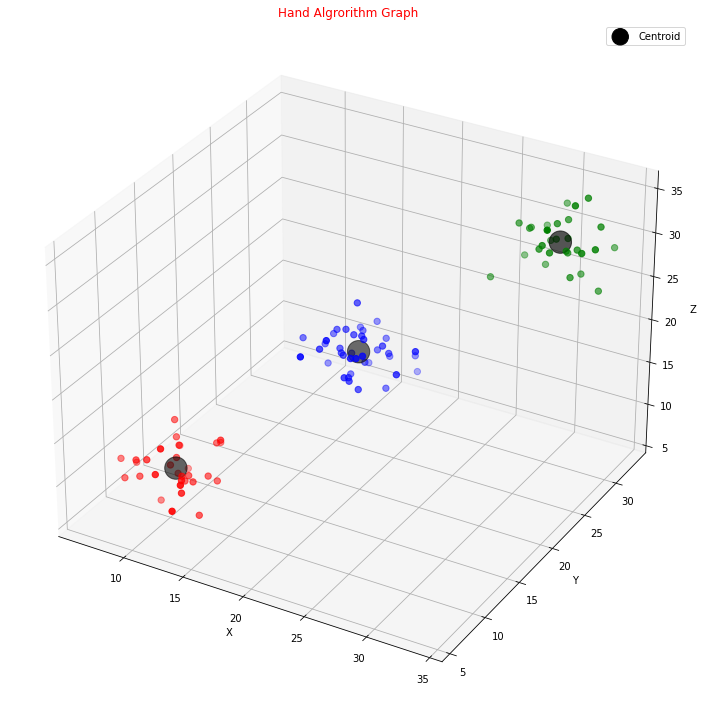

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# Setting Labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Hand Algrorithm Graph",c="red")
colors = {"1":"red", "2":"blue", "3":"green", "c":"black"}
ax.scatter(xs=master_df["X"],
           ys=master_df["Y"],
           zs=master_df["Z"],
           c=master_df["Assigned_Cluster"].map(colors),
           s=master_df["Size"],
           label="Centroid")
ax.legend()
fig.tight_layout()

Part 2 - sklearn K-means

Write code to use the k-means clustering algorithm.   Test your data on the same data set as above.
 You should print out the same data as above for the hand coded version.  Also use the predict method to show your
 model successfully predicting which cluster a new point should be added to.  For example this code does just that
 for point (8,8,8), (19,19,19), and (31,31,31):

kmeans = KMeans(n_clusters=3, random_state=0).fit(df)  # df is the DataFrame holding the data

print('means for the three clusters are:') <br>
print(kmeans.cluster_centers_) <br>
print('Using the clustering model to predict clusters now.') <br>
print('kmeans.predict( [ [8,8,8], [19,19,19], [31,31,31]] ) returns: ') <br>
print(kmeans.predict( [ [8,8,8], [19,19,19], [31,31,31]] ) ) <nr>

What to upload: <br>
Label your code:   handCoded.py  and sklearn.py and upload those two files <br>
Name your output:  handCodedOut.txt and sklearnOut.txt and upload those two files.

In [20]:
from sklearn.cluster import KMeans

# Importing the data
df2 = pd.read_csv('exercise8_infile1.csv').to_numpy()

kmeans = KMeans(init='k-means++', n_clusters=3, random_state=0).fit(df2)

print(f'The means for the center are:\n {kmeans.cluster_centers_}')

The means for the center are:
 [[10.68939536  9.85623874 10.38261651]
 [19.82566512 20.14187353 20.18852273]
 [30.85866444 29.82747351 30.36625507]]


In [21]:
print(f'Using the clustering model to predict clusters now:\n{kmeans.predict([[8,8,8], [19,19,19], [31,31,31]])}')

Using the clustering model to predict clusters now:
[0 1 2]


In [22]:
# df2["Clusters"] = kmeans.labels_.astype(int)
kmeans.labels_

array([1, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2,
       0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2])

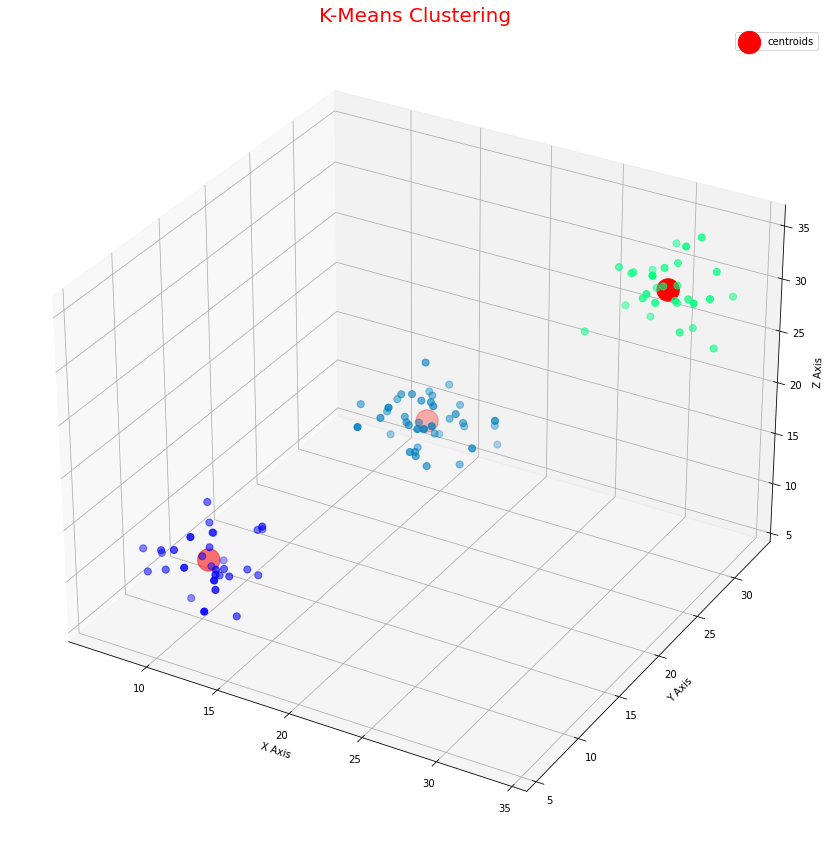

In [23]:
# https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
# https://h1ros.github.io/posts/k-means-clustering/


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
colors = {0:"red", 1:"blue", 2:"green"}
ax.scatter(df2[:,0], df2[:,1], df2[:,2],
           c=kmeans.labels_,
           cmap='winter',
           s=50)
ax.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,2],
           c="red",
           s=500,
           marker="o",
           label='centroids')
ax.set_title('K-Means Clustering', color='red', size=20)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.legend(loc='upper right')
plt.show()